In [1]:
pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
import math

In [3]:
#loading the dataset
student_performance = fetch_ucirepo(id=320)

#defining features and targets
X = student_performance.data.features
y = student_performance.data.targets

print("\nFirst Few Rows of Features (X):")
print(X.head())
print("\nFirst Few Rows of Targets (y):")
print(y.head())


First Few Rows of Features (X):
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet  romantic  famrel  freetime goout Dalc Walc health absences  
0    yes       no        no       4         3     4    1    1      3        4  
1    yes      yes        no       5         3     3    1    1      3        2  
2    yes      yes        no       4         3     2    2    3      3        6  
3    yes      yes       yes       3         2     2    1    1      5        0  
4    yes       no        no       4         3     2    1    2      5        0  


# Summary Statistics

In [4]:
#feature information
print("\nGeneral Information About Features (X):")
X.info()


General Information About Features (X):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery  

In [5]:
#summary statistics for numerical features
numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime',
                      'failures', 'famrel', 'freetime', 'goout',
                      'Dalc', 'Walc', 'health', 'absences']
print("\nSummary Statistics for Numerical Features:")
print(X[numerical_features].describe())


Summary Statistics for Numerical Features:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.28043

In [6]:
print("\nGeneral Information About Target (G3):")
print(y['G3'].describe())


General Information About Target (G3):
count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64


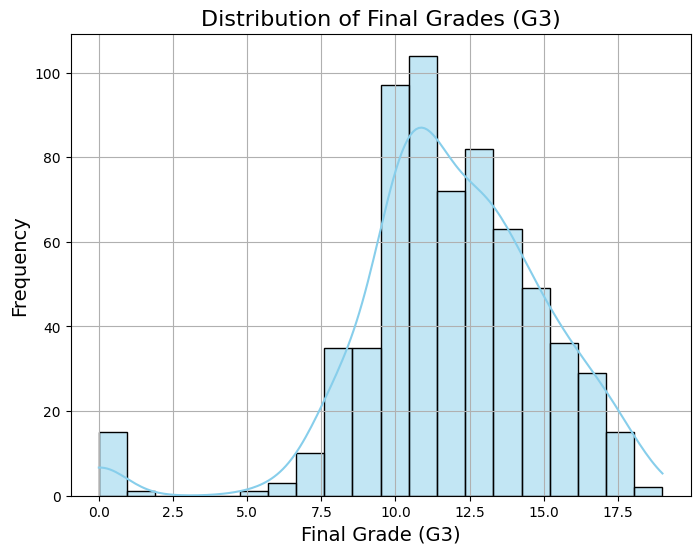

In [7]:
# Distribution of Final Grades (G3)
plt.figure(figsize=(8, 6))
sns.histplot(data=y['G3'], kde=True, bins=20, color="skyblue")
plt.title("Distribution of Final Grades (G3)", fontsize=16)
plt.xlabel("Final Grade (G3)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)

# Numerical Features

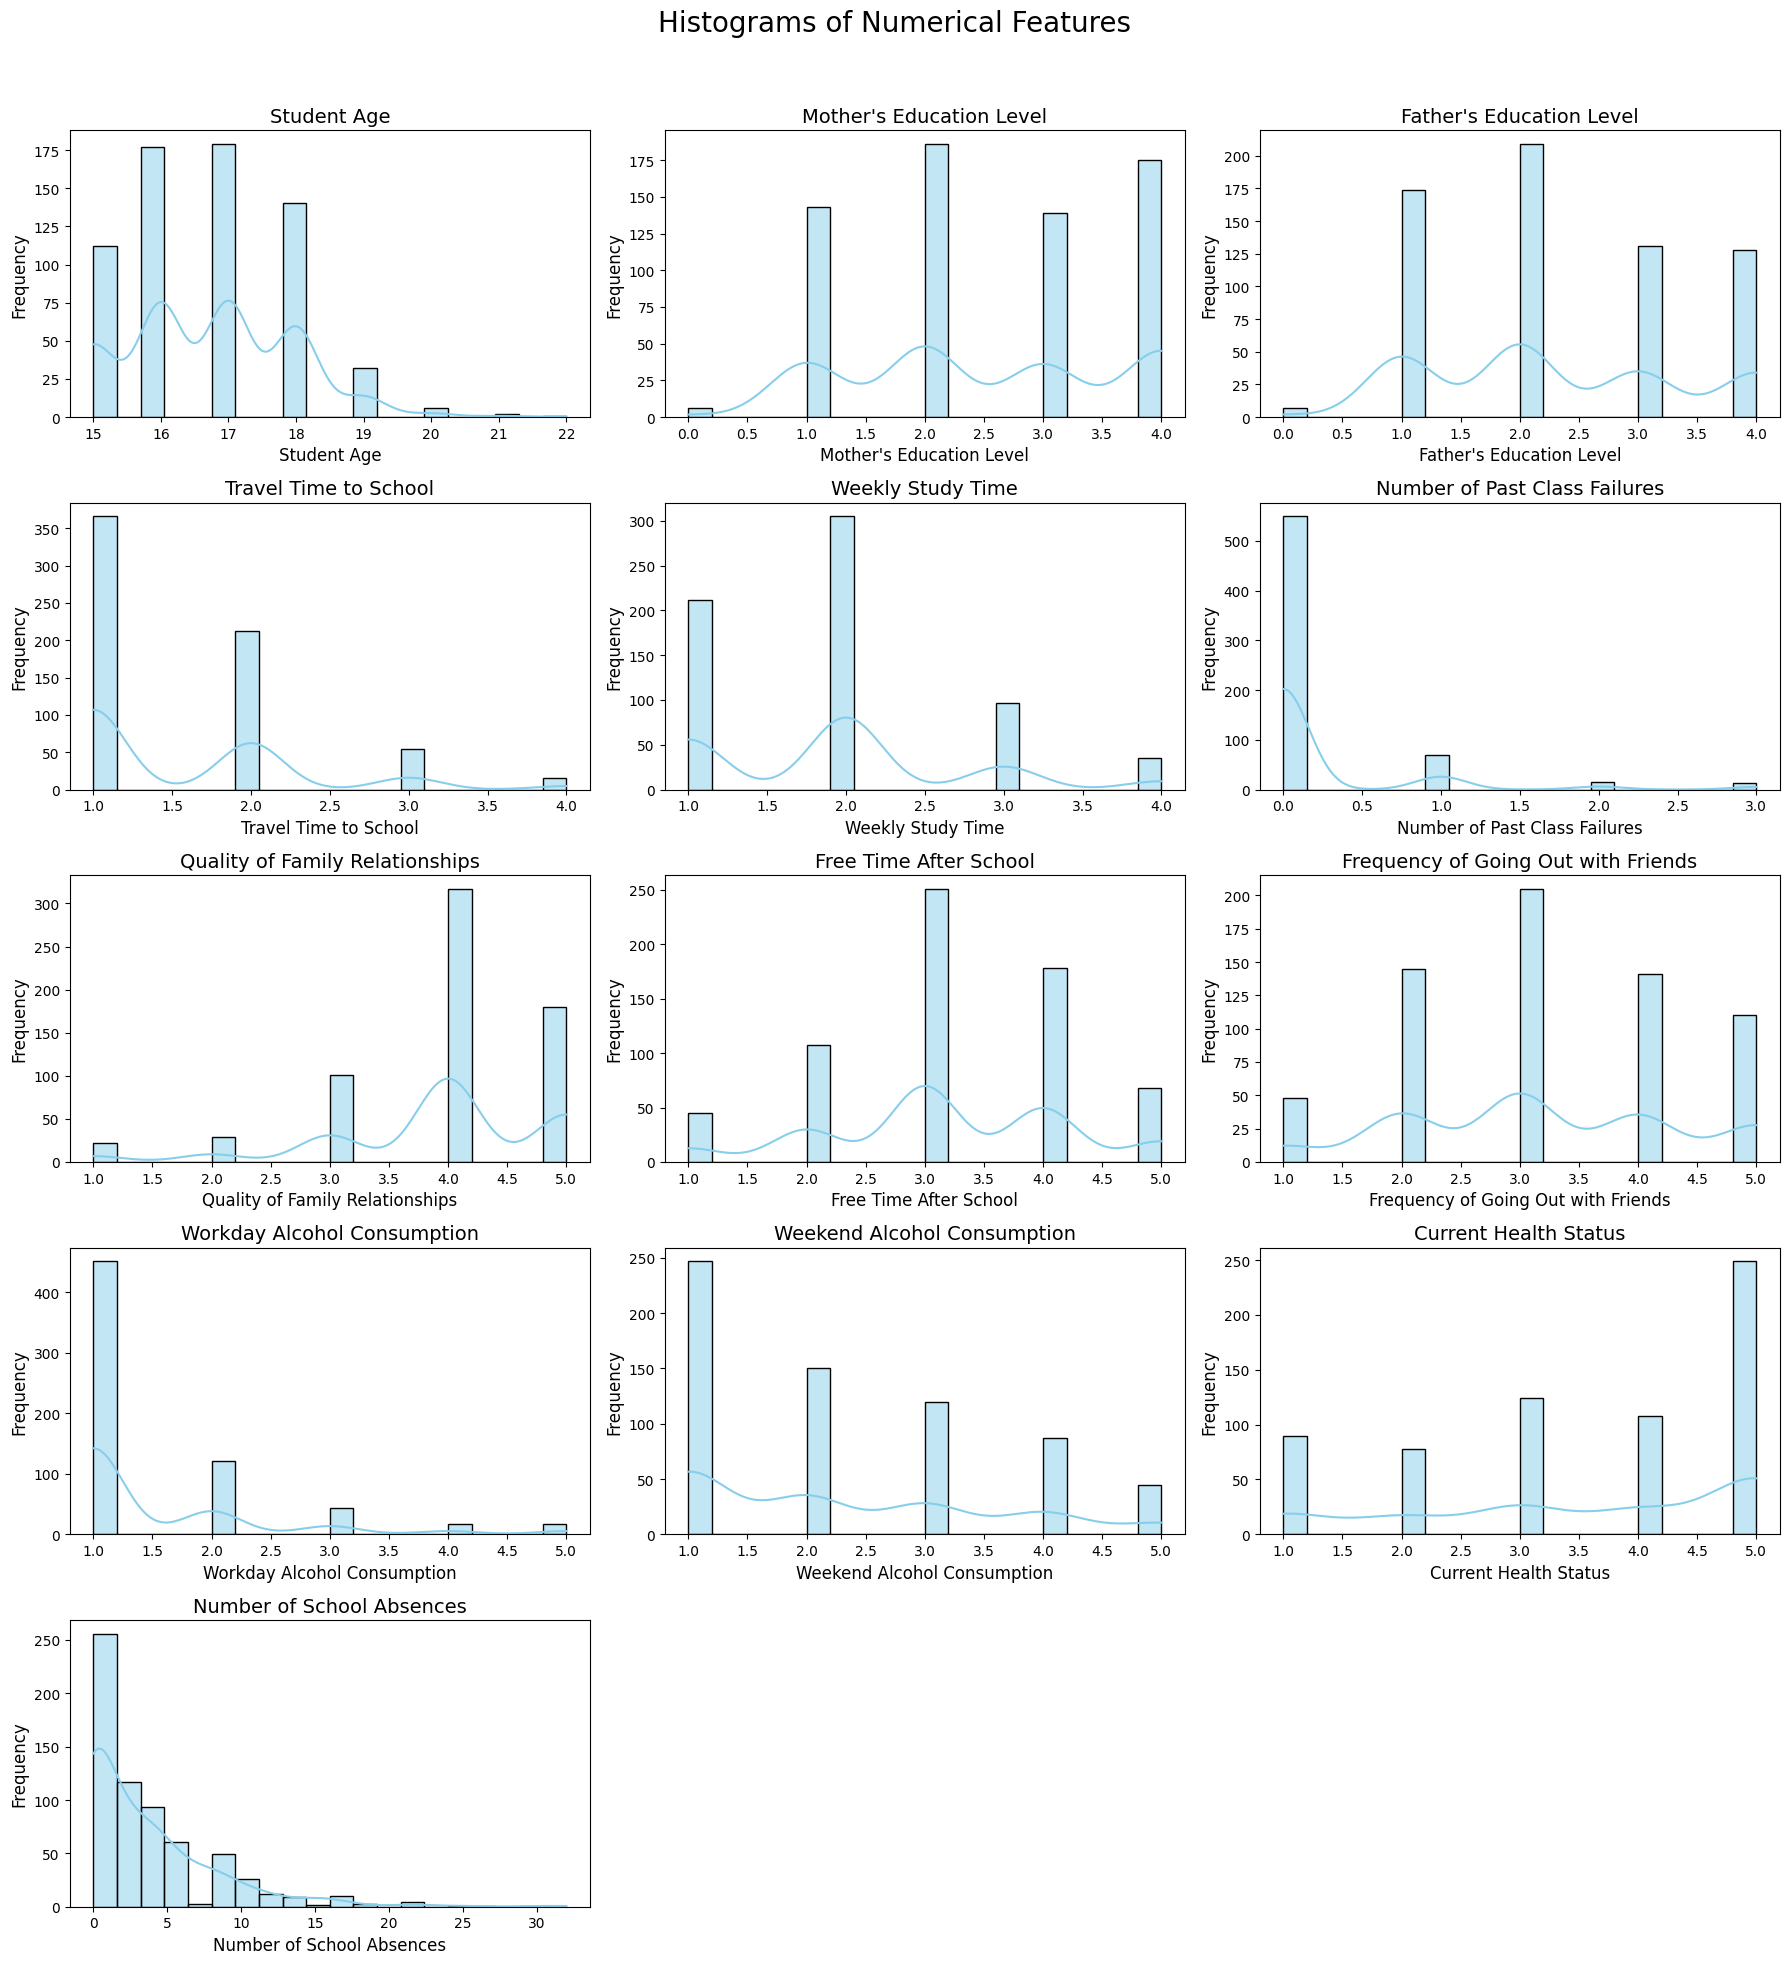

In [8]:
#creating a dictionary to define titles for numerical variables for better understanding
variable_titles = {
    "age": "Student Age",
    "Medu": "Mother's Education Level",
    "Fedu": "Father's Education Level",
    "traveltime": "Travel Time to School",
    "studytime": "Weekly Study Time",
    "failures": "Number of Past Class Failures",
    "famrel": "Quality of Family Relationships",
    "freetime": "Free Time After School",
    "goout": "Frequency of Going Out with Friends",
    "Dalc": "Workday Alcohol Consumption",
    "Walc": "Weekend Alcohol Consumption",
    "health": "Current Health Status",
    "absences": "Number of School Absences",
}

#creating sub-plots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
axes = axes.flatten()

for i, (feature, title) in enumerate(variable_titles.items()):
    sns.histplot(X[feature], kde=True, bins=20, ax=axes[i], color="skyblue", edgecolor="black")
    axes[i].set_title(title, fontsize=14)
    axes[i].set_xlabel(title, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

#turning off unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.suptitle("Histograms of Numerical Features", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])


<ipython-input-9-63fb7dd529a6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-9-63fb7dd529a6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-9-63fb7dd529a6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-9-63fb7dd529a6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-9-63fb7dd529a6>:12: FutureWarning: 

Pass

Text(0.5, 0.98, 'Violin Plots of Numerical Features and G3')

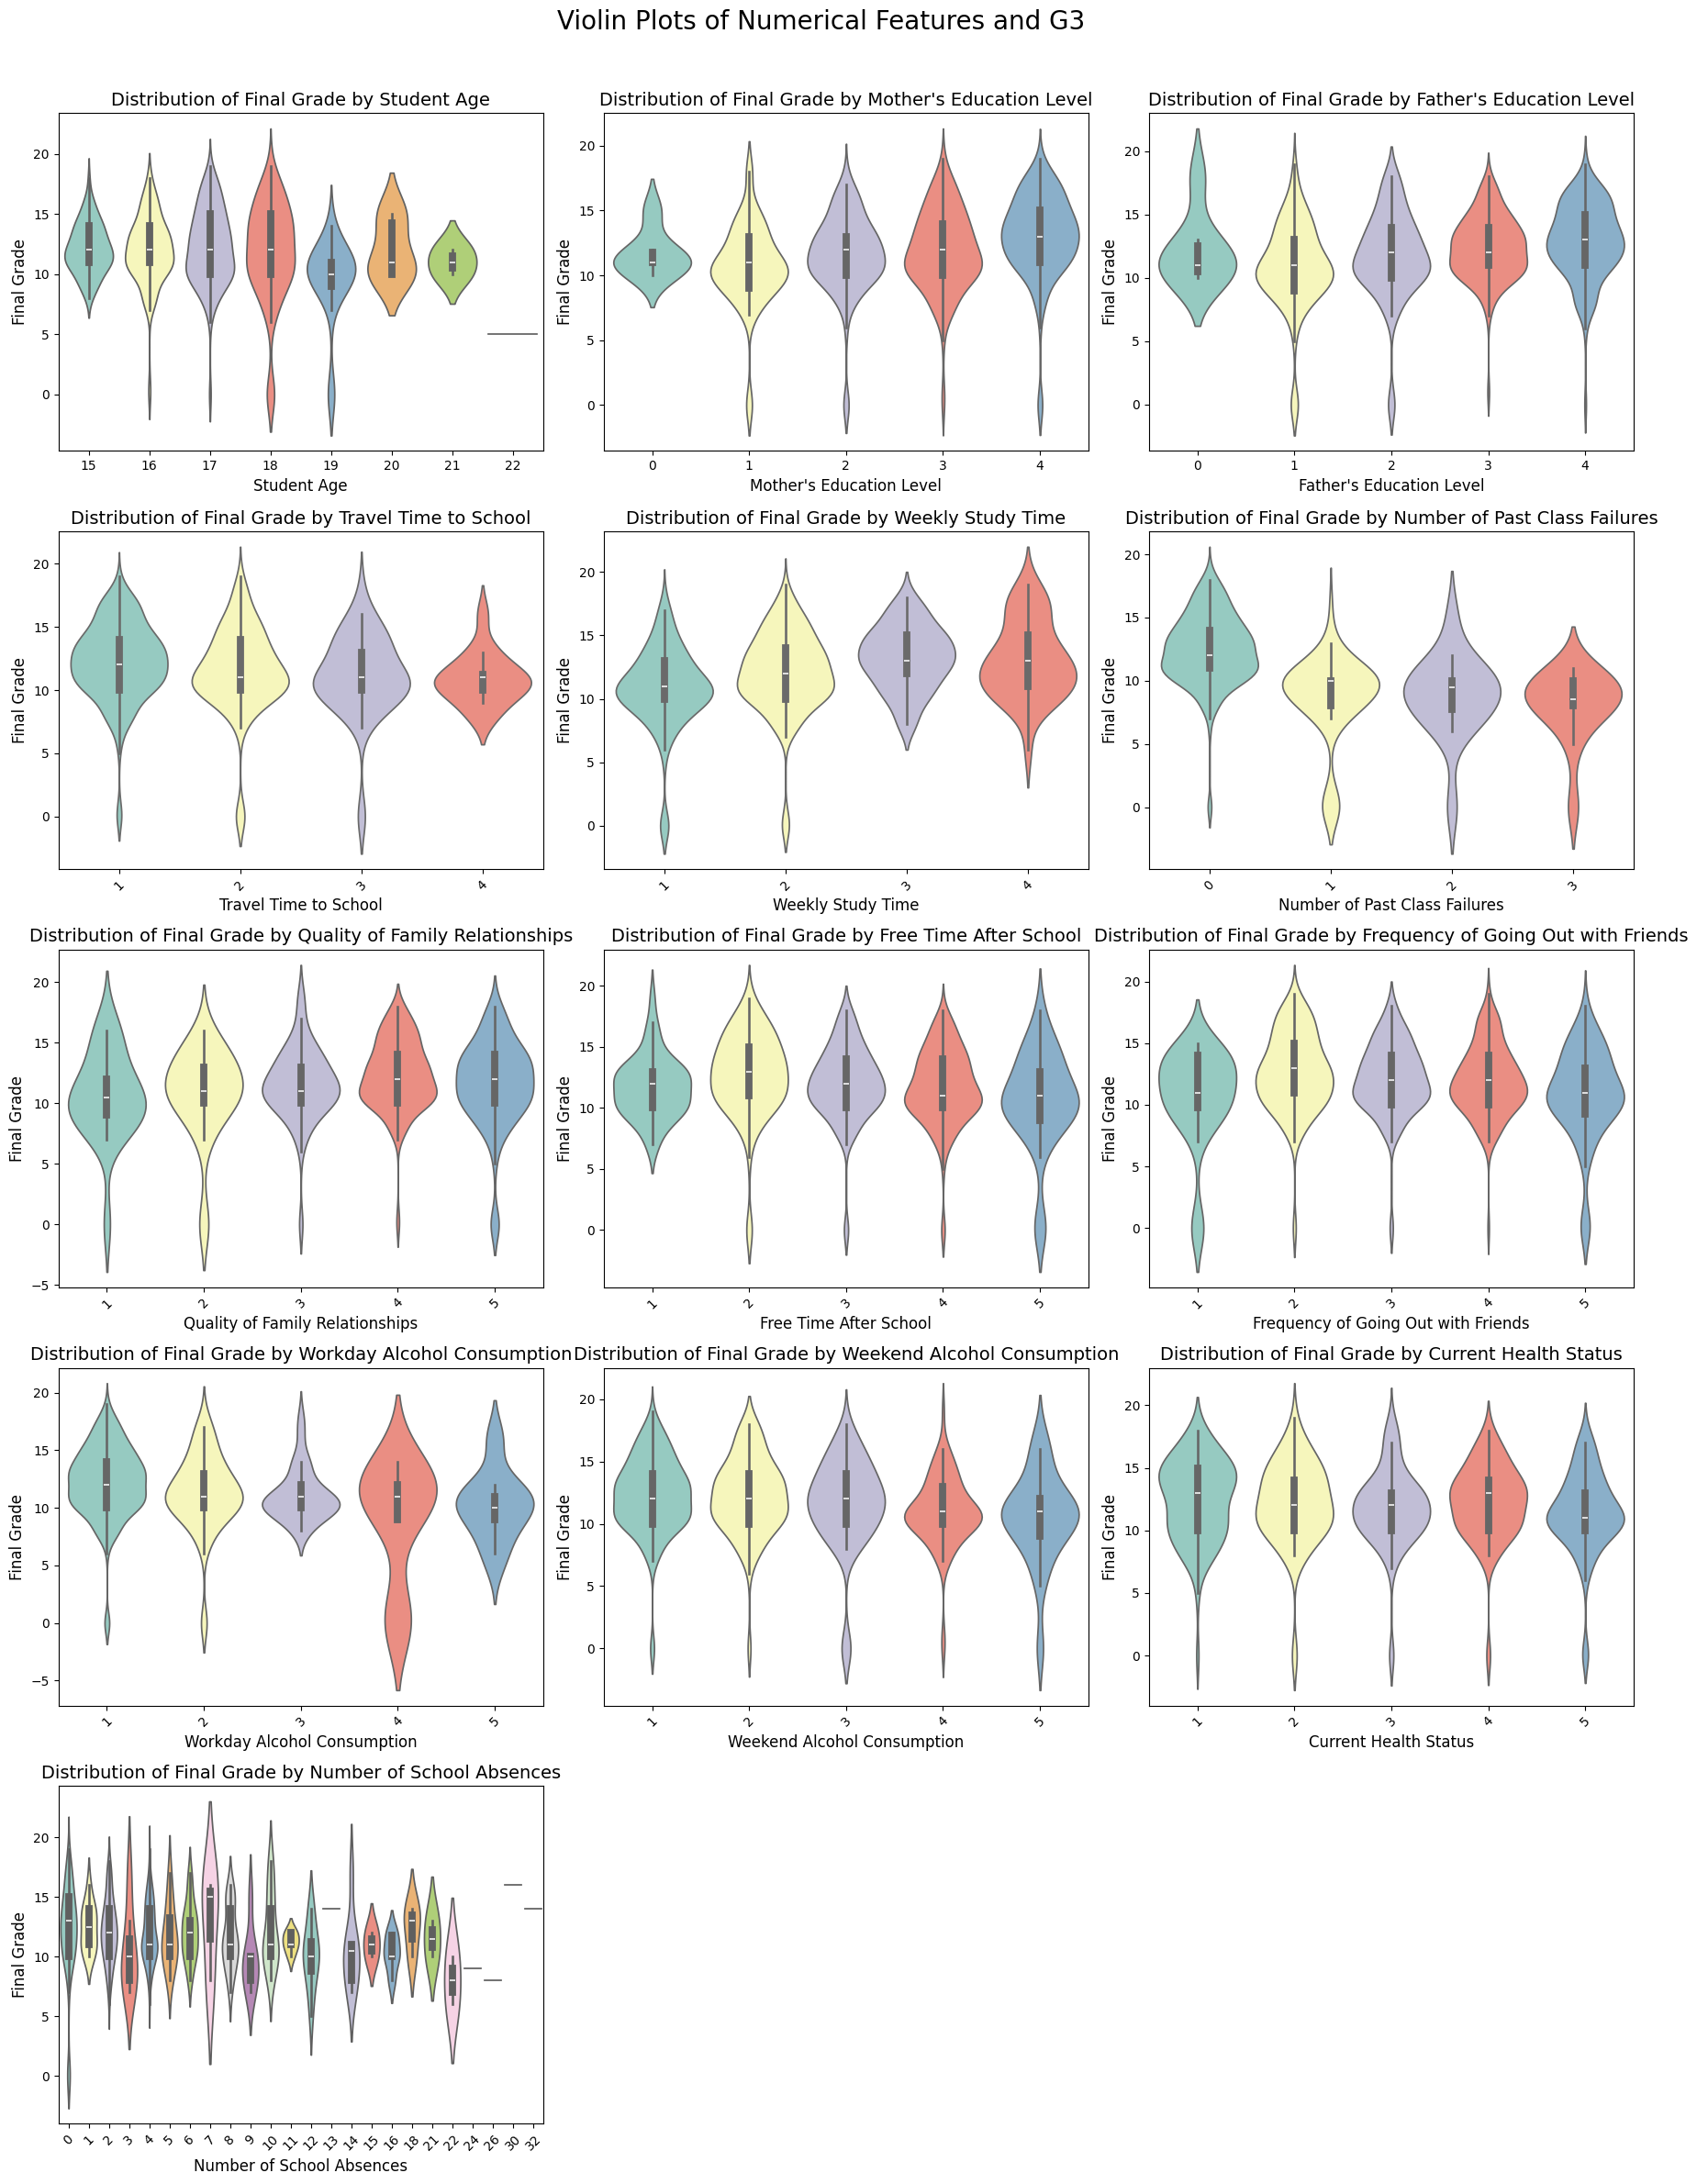

In [9]:

#calculating optimal number of rows and columns
num_features = len(numerical_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

#creating subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, num_rows * 5))
fig.subplots_adjust(hspace=0.8, wspace=0.3)

axes = axes.flatten()
for i, feature in enumerate(numerical_features):
    sns.violinplot(
        data=X.join(y),
        x=feature,
        y='G3',
        ax=axes[i],
        palette="Set3"
    )
    axes[i].set_title(f"Distribution of Final Grade by {variable_titles[feature]}", fontsize=14)
    axes[i].set_xlabel(variable_titles[feature], fontsize=12)
    axes[i].set_ylabel("Final Grade", fontsize=12)


    if feature in ['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']:
        axes[i].tick_params(axis='x', rotation=45)

#turning off  unused subplots
for j in range(len(numerical_features), len(axes)):
    axes[j].axis("off")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Violin Plots of Numerical Features and G3", fontsize=20)

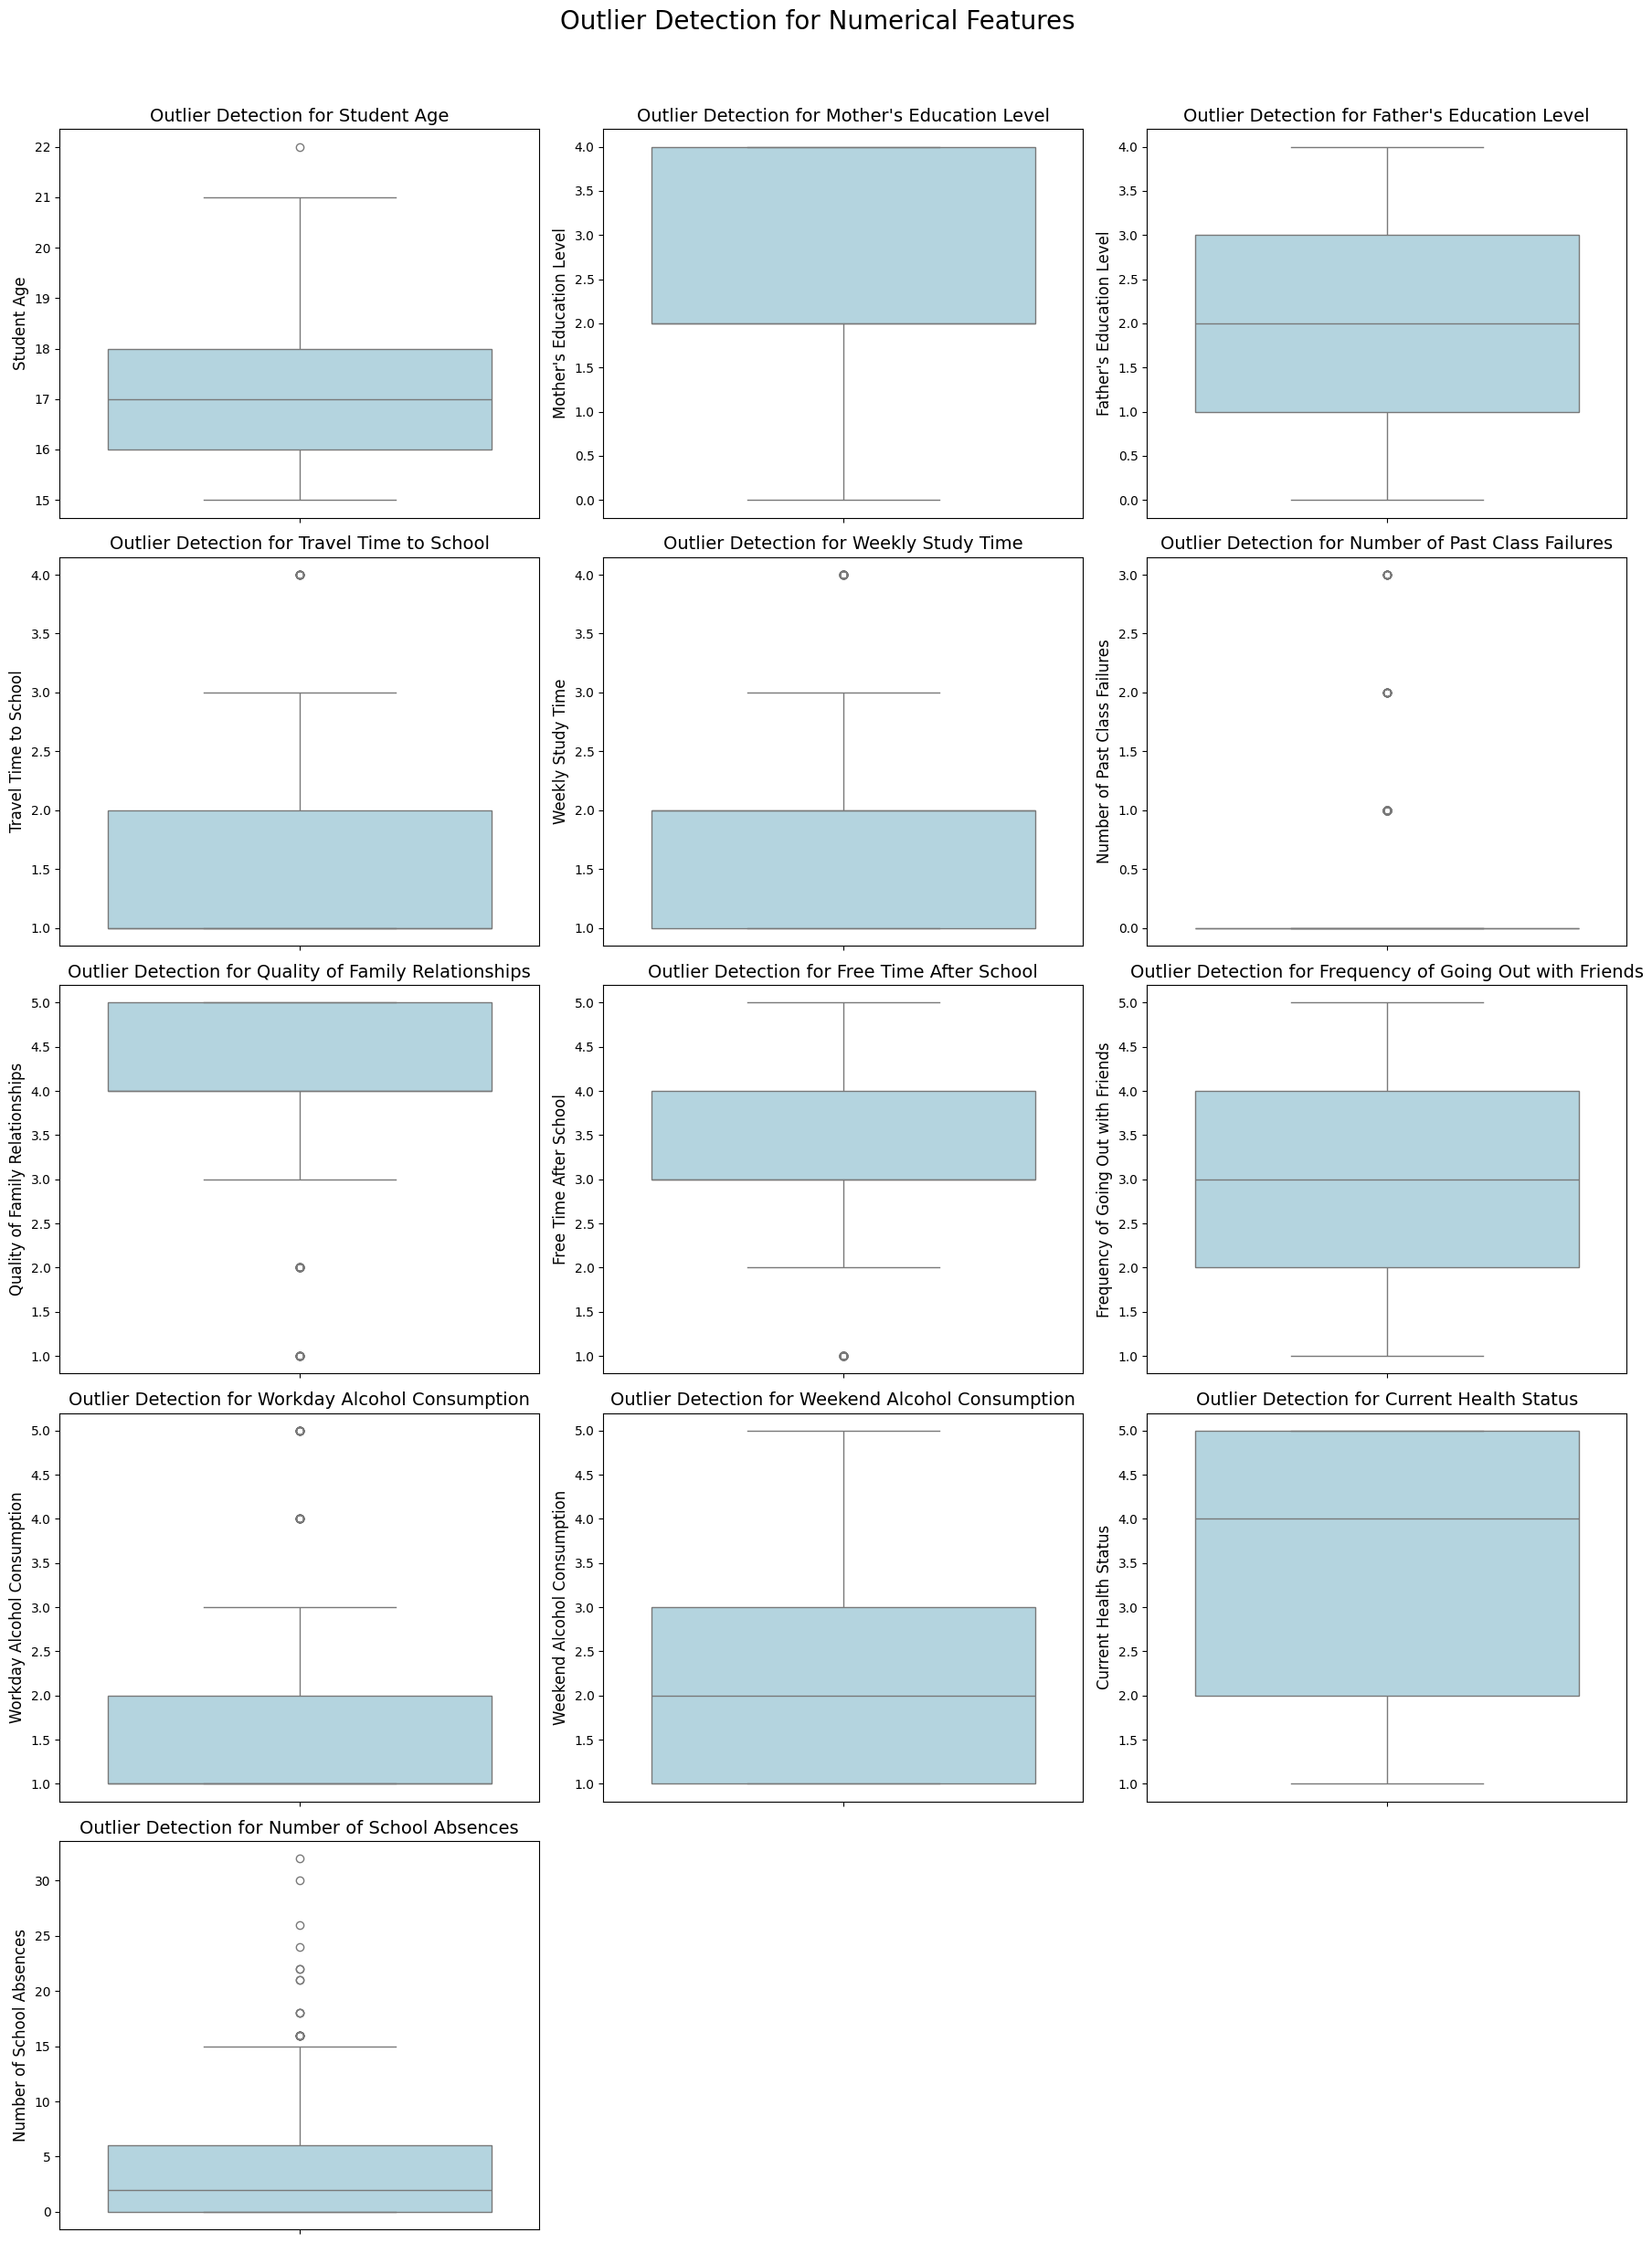

In [10]:
#boxplots for outlier detection within numerical features

#calculating optimal number of rows and columns
num_features = len(numerical_features)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, num_rows * 5))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(data=X, y=col, color="lightblue", ax=axes[i])

    axes[i].set_title(f"Outlier Detection for {variable_titles[col]}", fontsize=14)
    axes[i].set_ylabel(variable_titles[col], fontsize=12)

#turning off  unused subplots
for j in range(num_features, len(axes)):
    axes[j].axis("off")

plt.suptitle("Outlier Detection for Numerical Features", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])


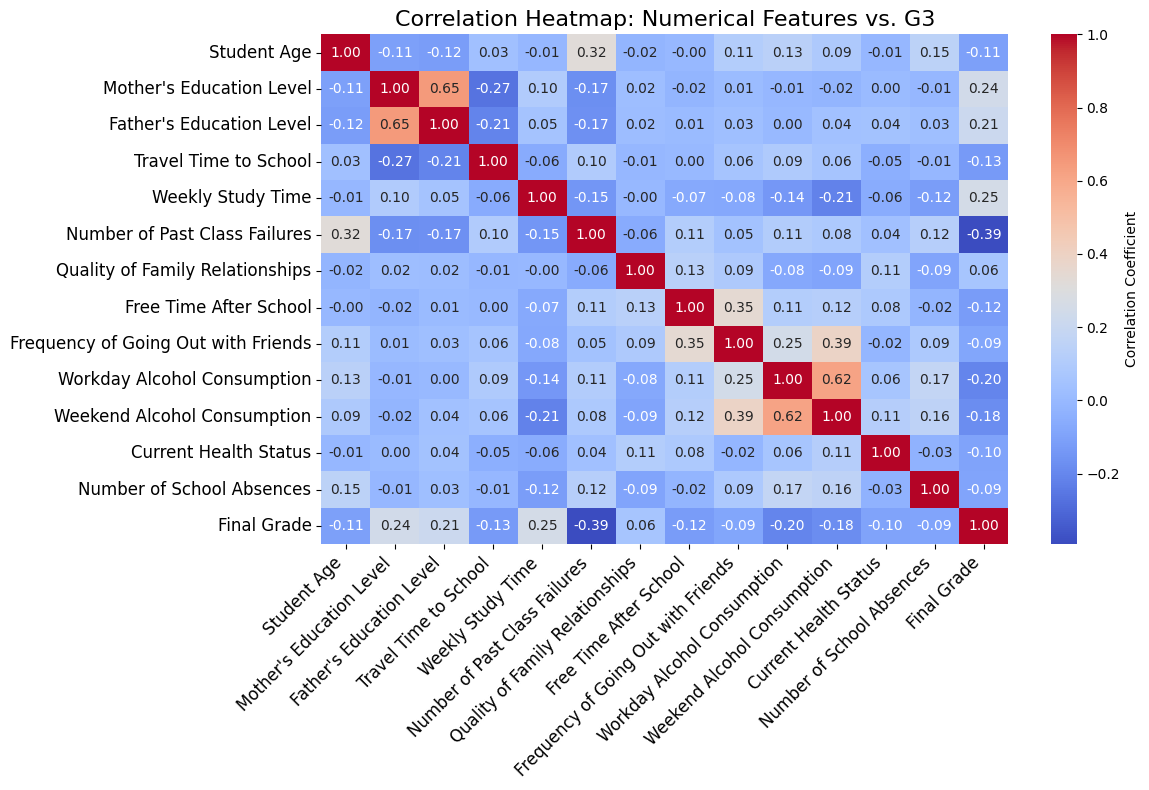

In [11]:
#combining features and target for correlation
data_for_correlation = pd.concat([X, y], axis=1)

#adding 'G3' to numerical features and dictionary 'variable_titles'

numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime',
                      'failures', 'famrel', 'freetime', 'goout',
                      'Dalc', 'Walc', 'health', 'absences']
numerical_features =  numerical_features + ['G3'] # Now concatenating lists
variable_titles['G3'] = 'Final Grade'

#calculating the correlation matrix
correlation_matrix = data_for_correlation[numerical_features].corr()

#creating a dictionary to map original feature names to custom labels
feature_labels = {feature: title for feature, title in variable_titles.items()
                  if feature in numerical_features}

#renaming columns and index using the custom labels
correlation_matrix = correlation_matrix.rename(index=feature_labels, columns=feature_labels)

#creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap: Numerical Features vs. G3", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()